# Effective Targetting of Advertisments

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./Dataset/data.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


# Data Preprocessing

> Dealing with Null Values

In [4]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

> There are null values present inside some of the columns of the dataset

In [5]:
data.rename(columns={'Daily Time Spent on Site':'Daily_Time_Spent_on_Site'}, inplace=True)

In [6]:
print(data['Daily_Time_Spent_on_Site'].mean())
print(data['Daily_Time_Spent_on_Site'].median())

65.00946268656716
68.37


In [7]:
data['Daily_Time_Spent_on_Site'].fillna(data['Daily_Time_Spent_on_Site'].median(),inplace=True)

In [8]:
print(data['Age'].mean())
print(data['Age'].median())

35.96292585170341
35.0


> Here we check for the mean and median value of `Age` column to find with which we can replace our null values

> Since `Age` cannot be in decimals so we consider the median of `Age` column to replace null values

In [9]:
data['Age'].fillna(data['Age'].median(),inplace = True)

> checking For `Area Income` column

In [10]:
print(data['Area Income'].mean())
print(data['Area Income'].median())

54958.57361723447
56998.245


In [11]:
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)

In [12]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


> round-off `Area Income` to two decimal points

In [13]:
data['Area Income'] = data['Area Income'].apply(lambda x: round(x, 2))


In [14]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [15]:
print(data['Daily Internet Usage'].mean())
print(data['Daily Internet Usage'].median())

180.04192039800995
183.42


> filling NULL values of `Daily Internet Usage` with mean

In [16]:
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)

In [17]:
data['City'].value_counts()

City
Williamsport         3
Lisamouth            3
Wrightburgh          2
Millerbury           2
North Charlesbury    2
                    ..
Karenton             1
Port Kathleenfort    1
Lake Adrian          1
Mollyport            1
South Jessica        1
Name: count, Length: 961, dtype: int64

> We will replace na values with `City` having most count

In [18]:
data['City'].value_counts().index[0]

'Williamsport'

In [19]:
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)

> Similarly for `Country` column

In [20]:
data['Country'].value_counts()

Country
Czech Republic    9
France            9
South Africa      8
Cyprus            8
Turkey            8
                 ..
Aruba             1
Germany           1
Montserrat        1
Jordan            1
Lesotho           1
Name: count, Length: 237, dtype: int64

In [21]:
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)

In [22]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [23]:
data.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

> So there are no NULL values now`

> Correlation between Columns

In [24]:
data.corr(numeric_only=True)

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily_Time_Spent_on_Site,1.000000,-0.327560,0.310296,0.514047,-0.742900
Age,-0.327560,1.000000,-0.178185,-0.366353,0.487808
Area Income,0.310296,-0.178185,1.000000,0.331394,-0.472515
Daily Internet Usage,0.514047,-0.366353,0.331394,1.000000,-0.785501
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.785501,1.000000


In [25]:
import seaborn as sns

<Axes: >

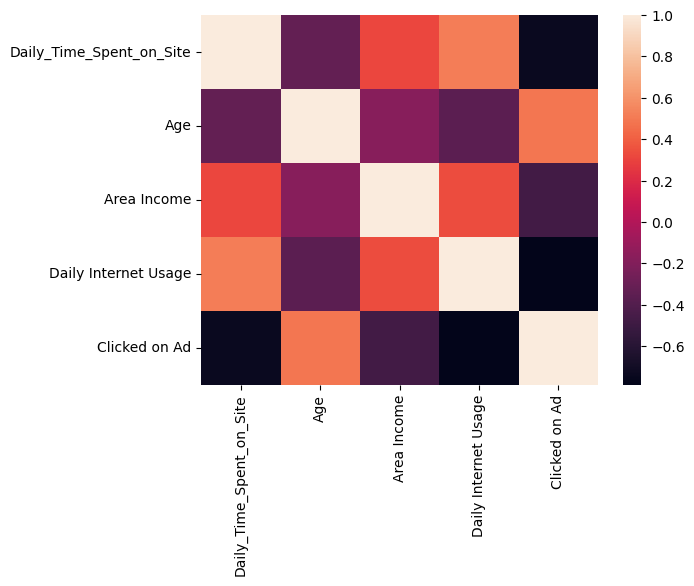

In [26]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: xlabel='Age', ylabel='Count'>

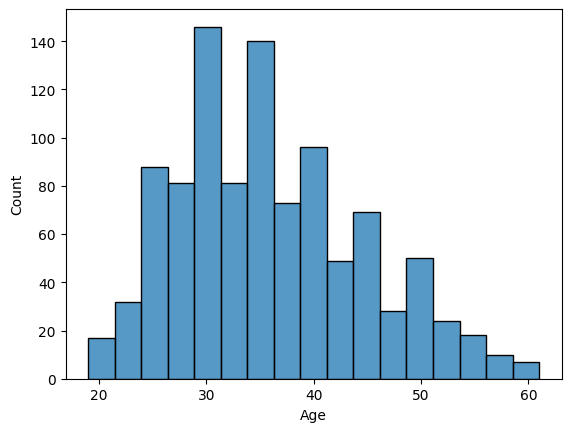

In [27]:
sns.histplot(data['Age'])

> Joint Plot Between `Area Income` column and `Age` Column

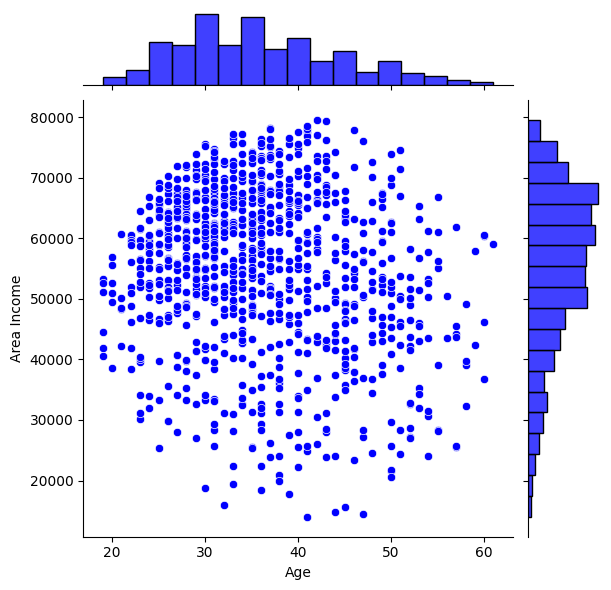

In [28]:
sns.jointplot(data=data,x='Age',y='Area Income',color="blue")

> Joint Plot Between `Daily Internet Usage` column and `Age` Column

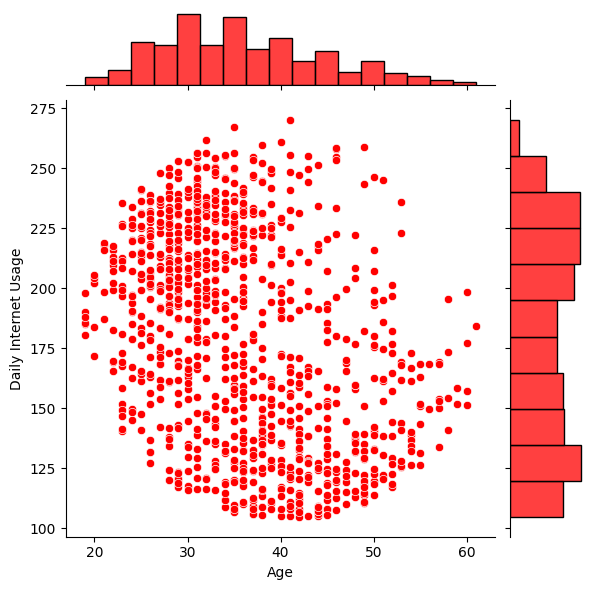

In [29]:
sns.jointplot(data=data,x='Age',y='Daily Internet Usage',color="red")

> Relation between each and every variable present in the dataset with target function Clicked On Ad

C:\Users\ayush\OneDrive\Desktop\Effective Targeting of Advertisments Using Machine Learning\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


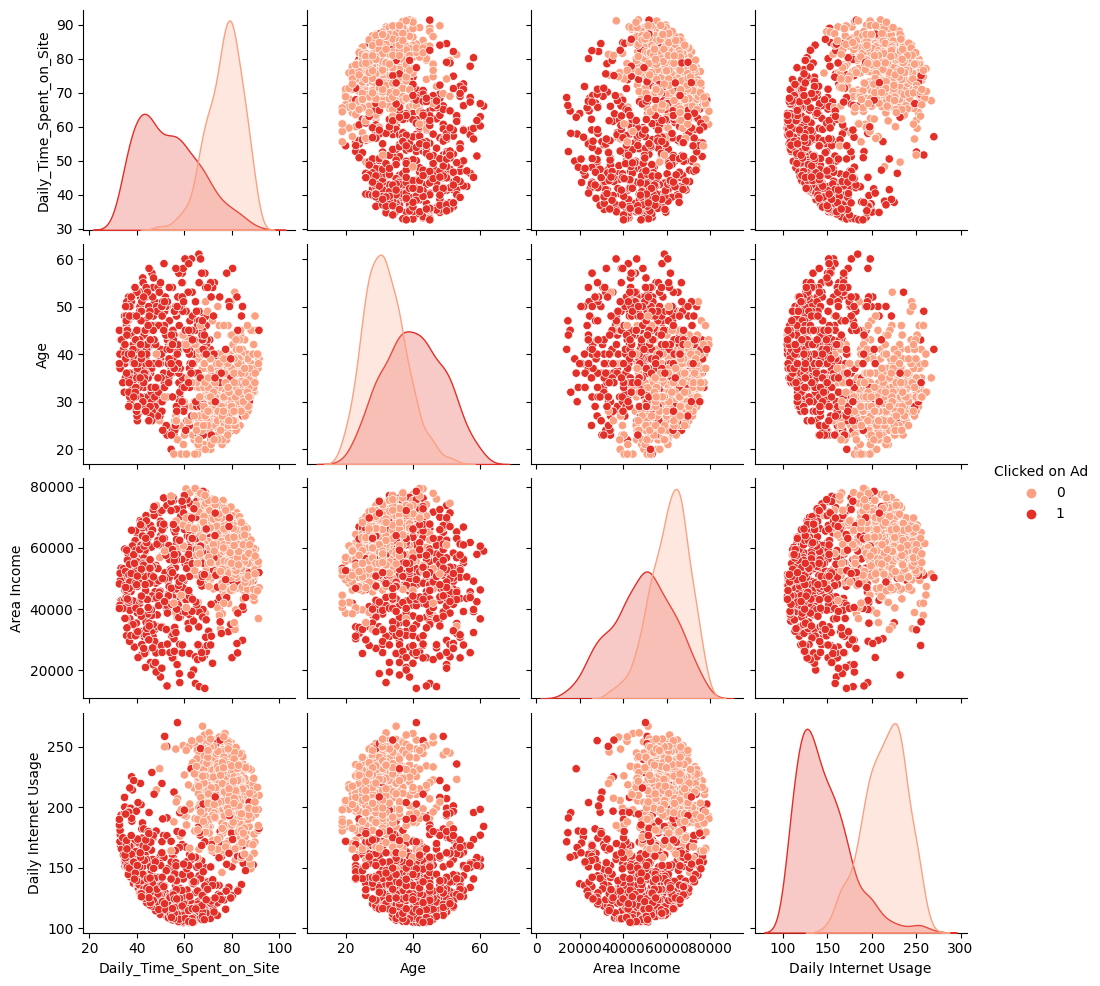

In [30]:
sns.pairplot(data,hue="Clicked on Ad",palette="Reds")

In [31]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
1    506
0    503
Name: count, dtype: int64

> This emplies that `Clicked on Ad` is balanced

In [32]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [33]:
data.to_csv('Dataset/cleaned_data.csv',index=False)

# Data Modelling

In [34]:
data = pd.read_csv('./Dataset/cleaned_data.csv')

In [35]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1009 non-null   float64
 1   Age                       1009 non-null   float64
 2   Area Income               1009 non-null   float64
 3   Daily Internet Usage      1009 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      1009 non-null   object 
 6   Gender                    1009 non-null   object 
 7   Country                   1009 non-null   object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [37]:
object_dtype = ['Ad Topic Line','City','Country']
data[object_dtype].describe(include=['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


> These columns have many unique values in them which will make it difficult to find a pattern from these columns to make a suitable model for predictions.


> So we reject the columns `Ad Topic Line`, `City`, `Country` 

> Now we check for `Time Stamp` Column which is object Data type.
We Split the column into two different Columns `Month` and `Hour`. So that Our model can effectively Target the best timezone trends.

In [38]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'],axis=1)

C:\Users\ayush\AppData\Local\Temp\ipykernel_10416\801685340.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [39]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,1,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,6,3


> Label Encoding `Gender` Column using Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [42]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3


In [43]:
data.corr(numeric_only=True)

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Hour
Daily_Time_Spent_on_Site,1.000000,-0.327560,0.310296,0.514047,-0.021174,-0.742900,-0.015955,0.005661
Age,-0.327560,1.000000,-0.178185,-0.366353,-0.016146,0.487808,0.018846,-0.054559
Area Income,0.310296,-0.178185,1.000000,0.331394,0.008326,-0.472515,-0.053745,0.030579
Daily Internet Usage,0.514047,-0.366353,0.331394,1.000000,0.027567,-0.785501,0.016158,0.073225
Gender,-0.021174,-0.016146,0.008326,0.027567,1.000000,-0.038563,0.003978,0.053415
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.785501,-0.038563,1.000000,0.018278,-0.049069
Month,-0.015955,0.018846,-0.053745,0.016158,0.003978,0.018278,1.000000,-0.015156
Hour,0.005661,-0.054559,0.030579,0.073225,0.053415,-0.049069,-0.015156,1.000000


<Axes: >

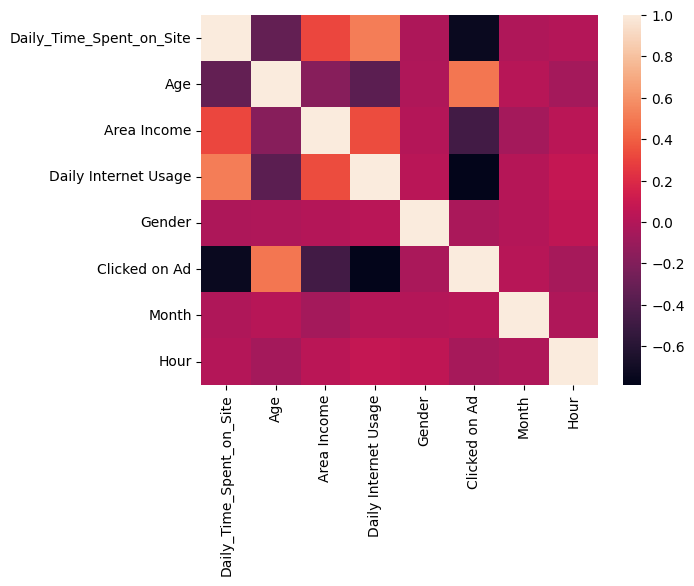

In [44]:
sns.heatmap(data.corr(numeric_only=True))

C:\Users\ayush\OneDrive\Desktop\Effective Targeting of Advertisments Using Machine Learning\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


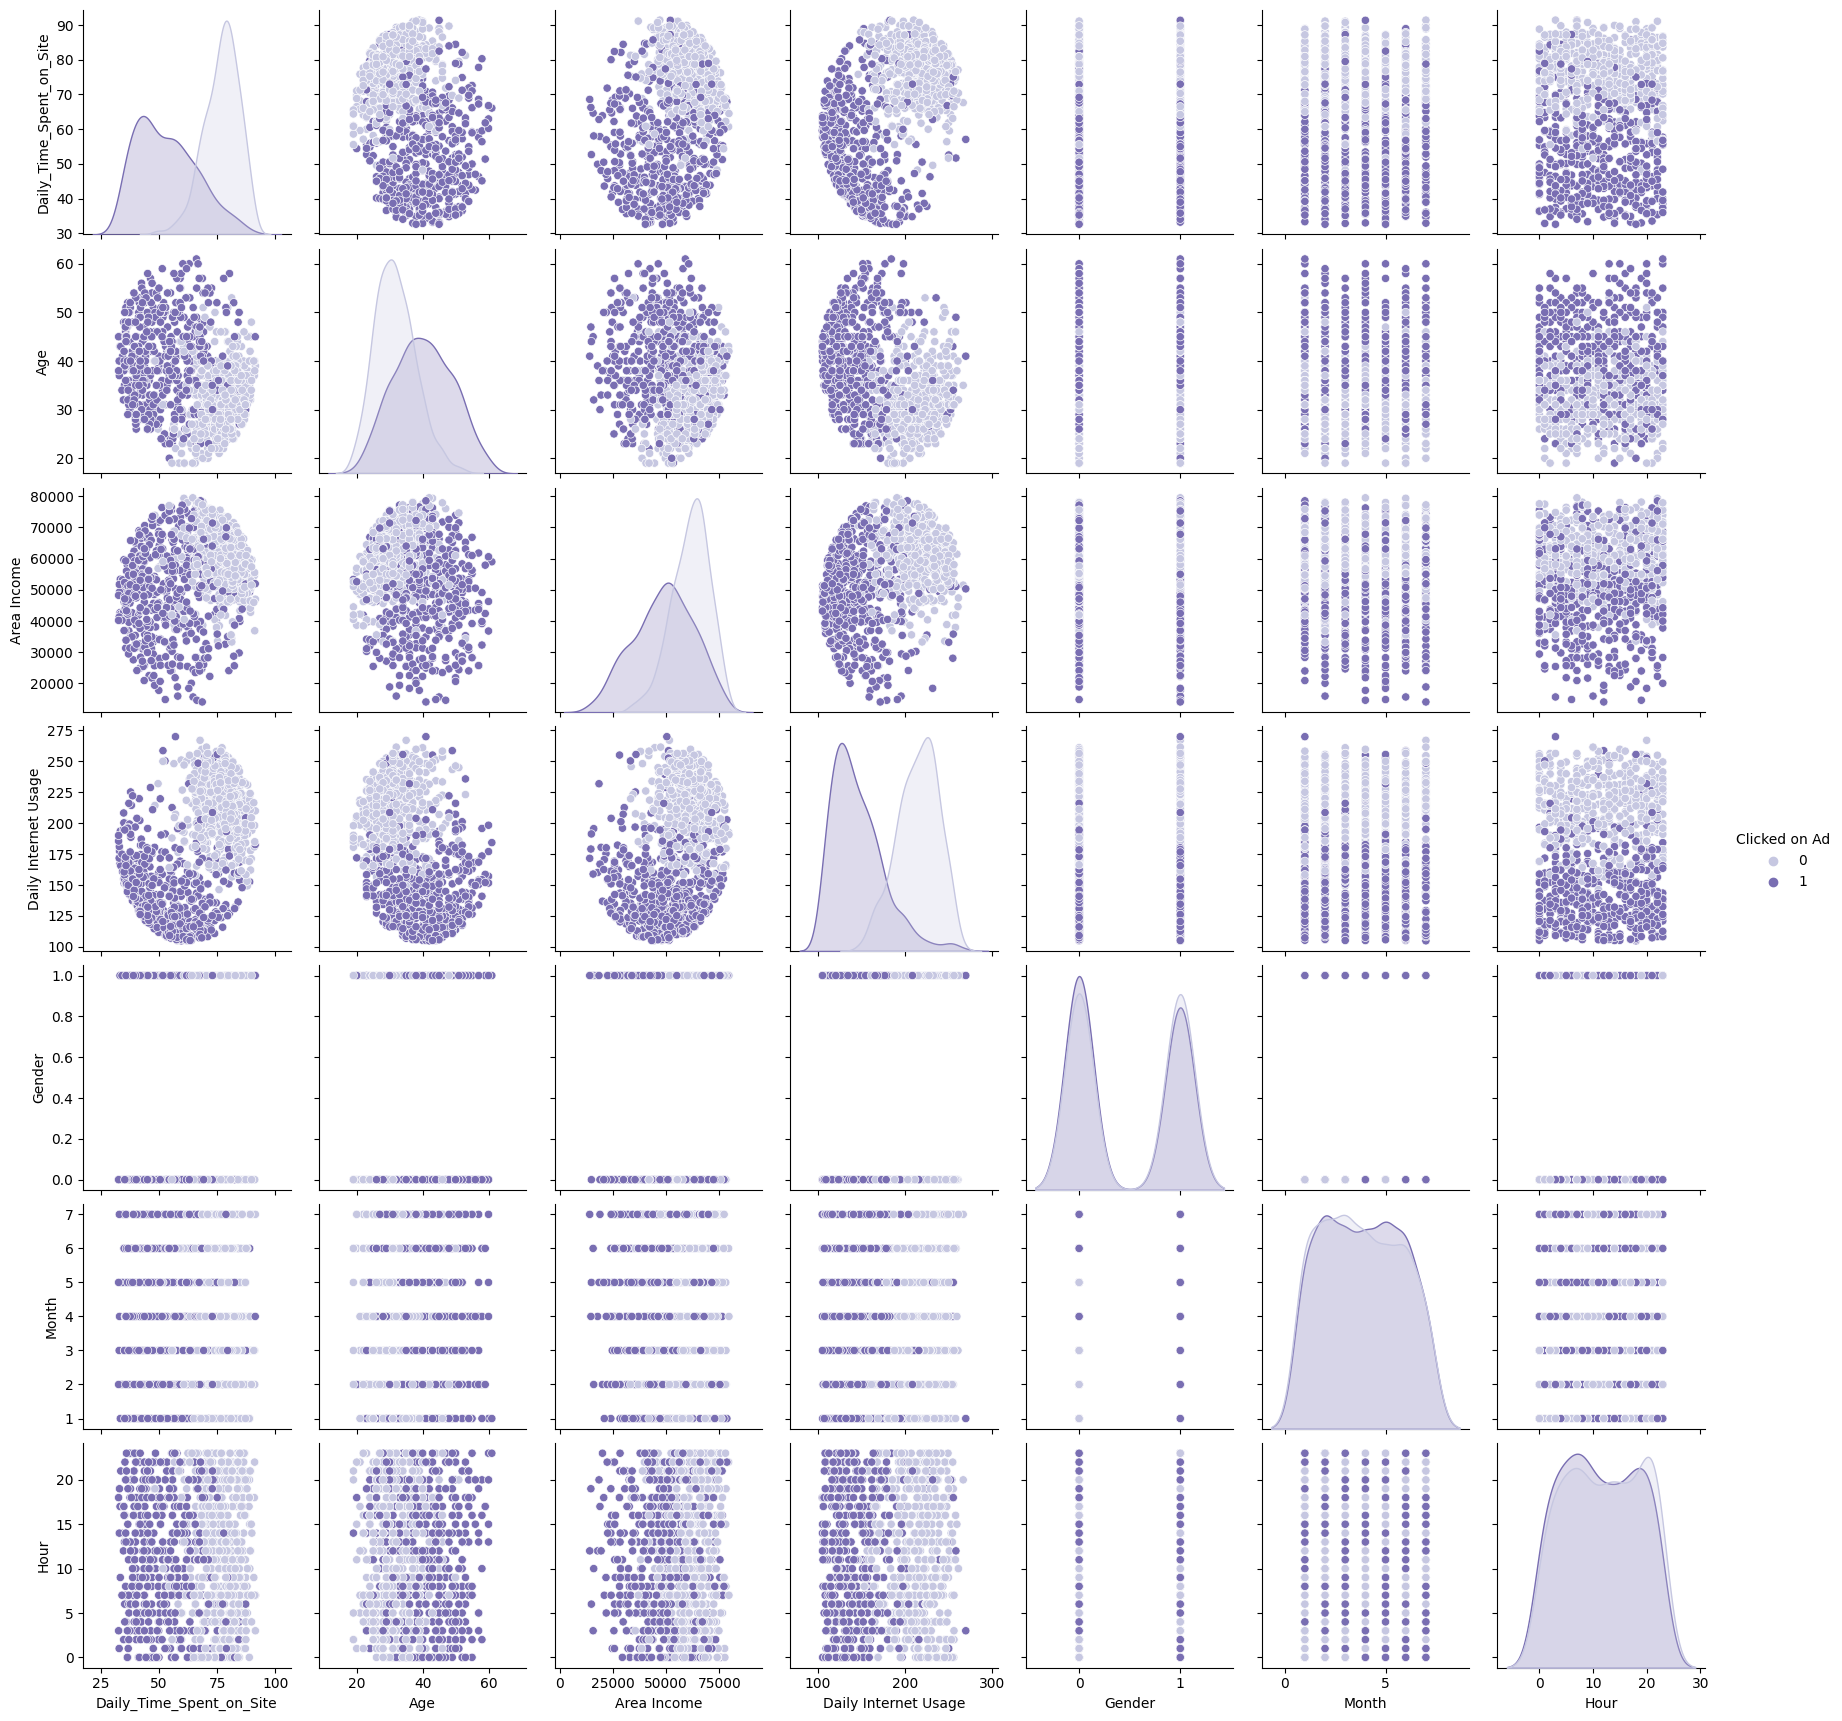

In [45]:
sns.pairplot(data,hue='Clicked on Ad',palette="Purples")

> Our Dataset is a classification Dataset i.e., it predicts values either as 0 or 1, which referes to `clicked` and `not clicked` respecively

> So the models which we can apply on  our dataset could be:
> * Decision Tree Classifier
> * Logistic Regression

# Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
y = data['Clicked on Ad']
X = data.iloc[:,[0,1,2,3,6,9,10]]

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [50]:
X.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Month,Hour
0,68.95,35.0,61833.90,256.09,0,3,0
1,68.37,31.0,68441.85,193.77,1,4,1
2,69.47,26.0,59785.94,236.50,0,3,20
3,74.15,29.0,54806.18,245.89,1,1,2
4,68.37,35.0,73889.99,225.58,0,6,3


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
decision_tree.score(X_test,y_test)

0.9504950495049505

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [73]:
print(f"Accuracy score is on TRAIN DATA: {accuracy_score(y_train, decision_tree.predict(X_train))}")
print(f"\nAccuracy score is on TEST DATA: {accuracy_score(y_test, decision_tree.predict(X_test))}")
print(f"\nF1 score is on TEST DATA: {f1_score(y_test, decision_tree.predict(X_test))}")
cm = confusion_matrix(y_test,decision_tree.predict(X_test))
print('\nConfusion Matrix :')
print(cm)

Accuracy score is on TRAIN DATA: 0.9886685552407932

Accuracy score is on TEST DATA: 0.9504950495049505

F1 score is on TEST DATA: 0.9488054607508534

Confusion Matrix :
[[149   7]
 [  8 139]]


In [75]:
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = decision_tree,X = X_train,y = y_train,cv = 10)
print("For Decision Tree : ")
print(f"Mean of Accuracy Score Using cross validation is {accuracies_dt.mean()}")
print(f"Standard Deviation of Accuracy Score Using cross validation is {accuracies_dt.std()}")

For Decision Tree : 
Mean of Accuracy Score Using cross validation is 0.9560764587525151
Standard Deviation of Accuracy Score Using cross validation is 0.01952250542323281


# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logist_model = LogisticRegression()
logist_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
random_forest_classifier.score(X_test,y_test)

0.9504950495049505

In [77]:
logist_predictions = logist_model.predict(X_test)

In [78]:
accuracy_score(y_test,logist_predictions)

0.900990099009901

In [81]:
print(classification_report(y_test,logist_predictions))
print(confusion_matrix(y_test,logist_predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       156
           1       0.92      0.87      0.90       147

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.90       303
weighted avg       0.90      0.90      0.90       303

[[145  11]
 [ 19 128]]


> We can see that our model gives 90% accuracy on normal Logistic Regression

> So we will apply hyperparameter tuning `newton-cg` on our LogisticRegression Model to increase the efficiency of the Model

In [82]:
from sklearn.linear_model import LogisticRegression
logist_model = LogisticRegression(solver = 'newton-cg')
logist_model.fit(X_train,y_train)

C:\Users\ayush\OneDrive\Desktop\Effective Targeting of Advertisments Using Machine Learning\venv\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ayush\OneDrive\Desktop\Effective Targeting of Advertisments Using Machine Learning\venv\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ayush\OneDrive\Desktop\Effective Targeting of Advertisments Using Machine Learning\venv\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [83]:
logist_predictions = logist_model.predict(X_test)

In [84]:
accuracy_score(y_test,logist_predictions)

0.9570957095709571

In [85]:
print(classification_report(y_test,logist_predictions))
print(confusion_matrix(y_test,logist_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303

[[151   5]
 [  8 139]]


So we conclude that applying hyperparameter tuning on our LogisticRegression Model we got that accuracy of `96%`


**So After Training the dataset through different kind of Model we get :**

**From the Decision Tree Classifier Model we get :**
Mean of Accuracy score as 0.93


**From the Logistic Regression Model we get :**
Mean of Accuracy score as 0.90


**From the Logistic Regression Model (Hyperparameter tuning applied) we get :**
Mean of Accuracy score as 0.96

